Ejemplo cancion youtube 


In [3]:
#IMPORTANDO LIBRERÍAS 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [8]:

! pip install youtube-dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 19.6 MB/s 


In [9]:
link="https://youtu.be/kHYTWoTBka0"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

[youtube] kHYTWoTBka0: Downloading webpage
[youtube] kHYTWoTBka0: Downloading player a25d4acf
[download] Destination: audio.NA
[download] 100% of 1.94MiB in 00:29
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [10]:
!ffmpeg -i audio.mp3 output.wav 


ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [11]:
!pip install soundfile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import soundfile as sf # para instalar pip install soundfile 
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
c1=np.fft.rfft(x[:,0])
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [13]:
# ya que está definida en dos canales 
x.shape 


(5328456, 2)

In [24]:
#PARA IMPORTAR EL AUDIO Y QUE SE PUEDA ESCUCHAR 
from IPython.display import Audio
ns =                            30 #se reproducen los primeros ns segundos
Audio(x[:int(fs*ns),:].T,rate=fs)

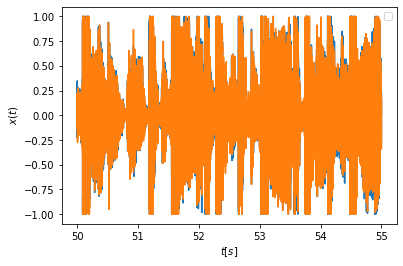

In [69]:
# PARA UN SOLO CANAL SE PONE 1 O 0 Y 0 = LADO IZQUIERDO, 1= LADO DERECHO, :=AMBOS
xpro = x.copy() #copiar archivos para procesar
ti = 50 #tiempo incio a procesar seg

tf = 55 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),:]
xs1 = xpro[int(ti*fs):int((tf*fs)),0]
xs2 = xpro[int(ti*fs):int((tf*fs)),1]
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

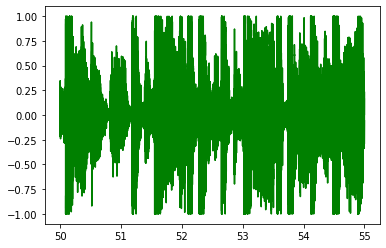

In [70]:
plt.plot(tt,xs1,color='green')#filtrado del canal izquierdo

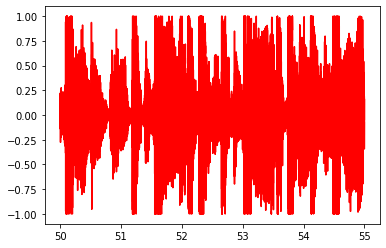

In [71]:
plt.plot(tt,xs2,color='red') #filtrado del canal derecho

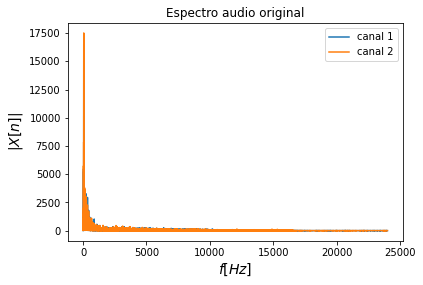

In [93]:
#Se cálcula el espectro de Fourier del segmento de audio escogido sobre cada canal (sonido estereo).
Xw = np.fft.rfft(xs,axis=0) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(np.size(xs,0),1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Xw))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

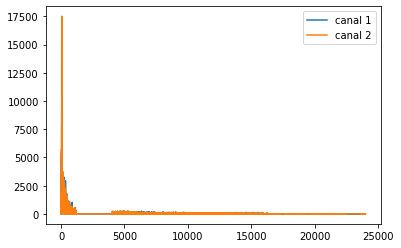

In [102]:
#  PASA BANDA con ~ y rechaza banda sin ~
#filtrar espectro
Xwf = Xw.copy()
f1 = 1200 #frecuencia en Hz corte 1
f2 = 4000 #frecuencia en Hz corte 2
ind =((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación 
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

In [75]:
xe2 = np.fft.irfft(Xwf,axis=0) #fft para recontruir la señal inversa sobre los dos canales de audio

In [76]:
Audio(xe2[:int(fs*ns),:].T,rate=fs)#repoducir señal filtrada

In [ ]:
name_out_fil = 'new_file.wav'
sf.write(name_out_fil, xe2, fs)
print('Audio filtrado\n',name_out_fil)

Audio filtrado
 new_file.wav
